In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3) 


In [2]:
#Read Data
df = pd.read_csv('electricity_prices.csv',low_memory=False)
df

DateTime         Holiday  HolidayFlag  DayOfWeek  WeekOfYear  \
0      01/11/2011 00:00            None            0          1          44   
1      01/11/2011 00:30            None            0          1          44   
2      01/11/2011 01:00            None            0          1          44   
3      01/11/2011 01:30            None            0          1          44   
4      01/11/2011 02:00            None            0          1          44   
...                 ...             ...          ...        ...         ...   
38009  31/12/2013 21:30  New Year's Eve            1          1           1   
38010  31/12/2013 22:00  New Year's Eve            1          1           1   
38011  31/12/2013 22:30  New Year's Eve            1          1           1   
38012  31/12/2013 23:00  New Year's Eve            1          1           1   
38013  31/12/2013 23:30  New Year's Eve            1          1           1   

       Day  Month  Year  PeriodOfDay ForecastWindProduction SystemLoadEA  \
0        1     11  2011            0                 315.31      3388.77   
1        1     11  2011            1                 321.80      3196.66   
2        1     11  2011            2                 328.57      3060.71   
3        1     11  2011            3                 335.60      2945.56   
4        1     11  2011            4                 342.90      2849.34   
...    ...    ...   ...          ...                    ...          ...   
38009   31     12  2013           43                1179.14      3932.22   
38010   31     12  2013           44                1152.01      3821.44   
38011   31     12  2013           45                1123.67      3724.21   
38012   31     12  2013           46                1094.24      3638.16   
38013   31     12  2013           47                1064.00      3624.25   

       SMPEA ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction  \
0      49.26           6.00         9.30       600.71               356.00   
1      49.26           6.00        11.10       605.42               317.00   
2      49.10           5.00        11.10       589.97               311.00   
3      48.04           6.00         9.30       585.94               313.00   
4      33.75           6.00        11.10       571.52               346.00   
...      ...            ...          ...          ...                  ...   
38009  34.51           6.00        22.20       285.31               812.00   
38010  33.83           5.00        24.10       278.31               852.00   
38011  31.75           4.00        20.40       280.91               962.00   
38012  33.83           5.00        14.80       302.46               950.00   
38013  33.83           5.00        16.70       308.01              1020.00   

      SystemLoadEP2 SMPEP2  
0           3159.60  54.32  
1           2973.01  54.23  
2           2834.00  54.23  
3           2725.99  53.47  
4           2655.64  39.87  
...             ...    ...  
38009       3692.95  42.45  
38010       3571.00  33.83  
38011       3460.29  31.75  
38012       3563.99  50.60  
38013       3517.08  34.90  

[38014 rows x 18 columns]

In [3]:
#dataFrame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

# Data Analyst

In [4]:
# Data Convertion to Numircal
numircal = ['ForecastWindProduction','SystemLoadEA','SMPEA','ORKTemperature','ORKWindspeed',
'CO2Intensity','ActualWindProduction','SystemLoadEP2','SMPEP2']
for col in numircal:
    df[col] = pd.to_numeric(df[col] , errors='coerce')

In [5]:
#data convertion to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'] ,format='%d/%m/%Y %H:%M' ,errors='coerce')

In [6]:
df['Holiday'].unique()

array(['None', 'Christmas Eve', 'Christmas', "St Stephen's Day",
       "New Year's Eve", "New Year's Day", "St Patrick's Day",
       'Good Friday', 'Holy Saturday', 'Easter', 'Easter Monday',
       'May Day', 'June Bank Holiday', 'August Bank Holiday',
       'October Bank Holiday'], dtype=object)

In [7]:
df.describe()

HolidayFlag     DayOfWeek    WeekOfYear           Day         Month  \
count  38014.000000  38014.000000  38014.000000  38014.000000  38014.000000   
mean       0.040406      2.997317     28.124586     15.739412      6.904246   
std        0.196912      1.999959     15.587575      8.804247      3.573696   
min        0.000000      0.000000      1.000000      1.000000      1.000000   
25%        0.000000      1.000000     15.000000      8.000000      4.000000   
50%        0.000000      3.000000     29.000000     16.000000      7.000000   
75%        0.000000      5.000000     43.000000     23.000000     10.000000   
max        1.000000      6.000000     52.000000     31.000000     12.000000   

               Year   PeriodOfDay  ForecastWindProduction  SystemLoadEA  \
count  38014.000000  38014.000000            38009.000000  38012.000000   
mean    2012.383859     23.501105              544.261451   4020.085019   
std        0.624956     13.853108              414.364629    860.476866   
min     2011.000000      0.000000                0.680000   2183.940000   
25%     2012.000000     12.000000              189.670000   3281.207500   
50%     2012.000000     24.000000              441.980000   4103.600000   
75%     2013.000000     35.750000              839.460000   4638.532500   
max     2013.000000     47.000000             1680.000000   6492.910000   

              SMPEA  ORKTemperature  ORKWindspeed  CO2Intensity  \
count  38012.000000    37719.000000  37715.000000  38007.000000   
mean      62.720388        9.626369     19.211770    479.373040   
std       32.252334        4.439934      9.571311     85.354706   
min        0.000000       -4.000000      0.000000      0.000000   
25%       45.530000        6.000000     13.000000    421.105000   
50%       55.230000        9.000000     18.500000    480.310000   
75%       70.320000       13.000000     24.100000    537.520000   
max      587.580000       25.000000     75.900000    842.880000   

       ActualWindProduction  SystemLoadEP2        SMPEP2  
count          38009.000000   38012.000000  38012.000000  
mean             520.762819    3785.973841     64.136823  
std              378.282975     843.269455     35.415036  
min                1.000000    1809.960000    -47.740000  
25%              199.000000    3058.277500     45.780000  
50%              445.000000    3865.745000     55.545000  
75%              793.000000    4427.590000     72.110000  
max             1769.000000    6309.750000   1000.000000

In [8]:
df.groupby('Year').describe()['SMPEP2'].transpose()

Year          2011          2012          2013
count  2928.000000  17566.000000  17518.000000
mean     60.296182     63.208553     65.709570
std      44.493199     33.279089     35.699857
min       0.000000    -47.740000      0.030000
25%      44.100000     45.652500     47.342500
50%      48.300000     54.440000     58.760000
75%      59.257500     71.050000     74.407500
max     487.780000    675.580000   1000.000000

In [9]:
df.groupby('Year').describe()['ForecastWindProduction'].transpose()

Year          2011          2012          2013
count  2928.000000  17565.000000  17516.000000
mean    824.286315    480.174769    561.718048
std     402.686626    367.274854    438.964989
min      39.620000      3.900000      0.680000
25%     480.057500    174.500000    181.615000
50%     865.330000    385.420000    448.795000
75%    1172.425000    713.700000    879.300000
max    1522.580000   1565.200000   1680.000000

In [10]:
df.corr()[['ForecastWindProduction','SystemLoadEA','SMPEA','ORKTemperature','ORKWindspeed',
'CO2Intensity','ActualWindProduction','SystemLoadEP2','SMPEP2']]

ForecastWindProduction  SystemLoadEA     SMPEA  \
HolidayFlag                           0.086078     -0.056336 -0.000549   
DayOfWeek                            -0.034807     -0.185166 -0.077833   
WeekOfYear                            0.049317     -0.027254 -0.018261   
Day                                   0.073624     -0.008627 -0.018567   
Month                                 0.052114     -0.031995 -0.018040   
Year                                 -0.052236     -0.081155  0.045344   
PeriodOfDay                           0.034641      0.608638  0.356302   
ForecastWindProduction                1.000000      0.177009 -0.046271   
SystemLoadEA                          0.177009      1.000000  0.532754   
SMPEA                                -0.046271      0.532754  1.000000   
ORKTemperature                       -0.172943     -0.086573  0.019148   
ORKWindspeed                          0.714308      0.182865  0.014335   
CO2Intensity                         -0.653763     -0.208044 -0.085590   
ActualWindProduction                  0.953510      0.200469 -0.031920   
SystemLoadEP2                         0.032739      0.972564  0.535331   
SMPEP2                               -0.080172      0.490802  0.617151   

                        ORKTemperature  ORKWindspeed  CO2Intensity  \
HolidayFlag                  -0.097015      0.063268     -0.067414   
DayOfWeek                    -0.015999     -0.054017      0.028015   
WeekOfYear                    0.155915     -0.028200     -0.097288   
Day                           0.014888      0.086866     -0.084517   
Month                         0.150265     -0.028420     -0.107876   
Year                          0.079380     -0.013207     -0.185930   
PeriodOfDay                   0.138369      0.088360     -0.176696   
ForecastWindProduction       -0.172943      0.714308     -0.653763   
SystemLoadEA                 -0.086573      0.182865     -0.208044   
SMPEA                         0.019148      0.014335     -0.085590   
ORKTemperature                1.000000      0.024413     -0.060950   
ORKWindspeed                  0.024413      1.000000     -0.513284   
CO2Intensity                 -0.060950     -0.513284      1.000000   
ActualWindProduction         -0.131559      0.729039     -0.673144   
SystemLoadEP2                -0.074297      0.083455     -0.105275   
SMPEP2                       -0.008836     -0.035385     -0.033774   

                        ActualWindProduction  SystemLoadEP2    SMPEP2  
HolidayFlag                         0.073947      -0.084735 -0.005577  
DayOfWeek                          -0.031222      -0.191667 -0.069745  
WeekOfYear                          0.065910      -0.041238 -0.016442  
Day                                 0.062776      -0.028229 -0.013629  
Month                               0.067856      -0.042769 -0.015551  
Year                               -0.069241      -0.057210  0.046116  
PeriodOfDay                         0.061301       0.593974  0.323008  
ForecastWindProduction              0.953510       0.032739 -0.080172  
SystemLoadEA                        0.200469       0.972564  0.490802  
SMPEA                              -0.031920       0.535331  0.617151  
ORKTemperature                     -0.131559      -0.074297 -0.008836  
ORKWindspeed                        0.729039       0.083455 -0.035385  
CO2Intensity                       -0.673144      -0.105275 -0.033774  
ActualWindProduction                1.000000       0.052932 -0.083364  
SystemLoadEP2                       0.052932       1.000000  0.516825  
SMPEP2                             -0.083364       0.516825  1.000000

<AxesSubplot:>

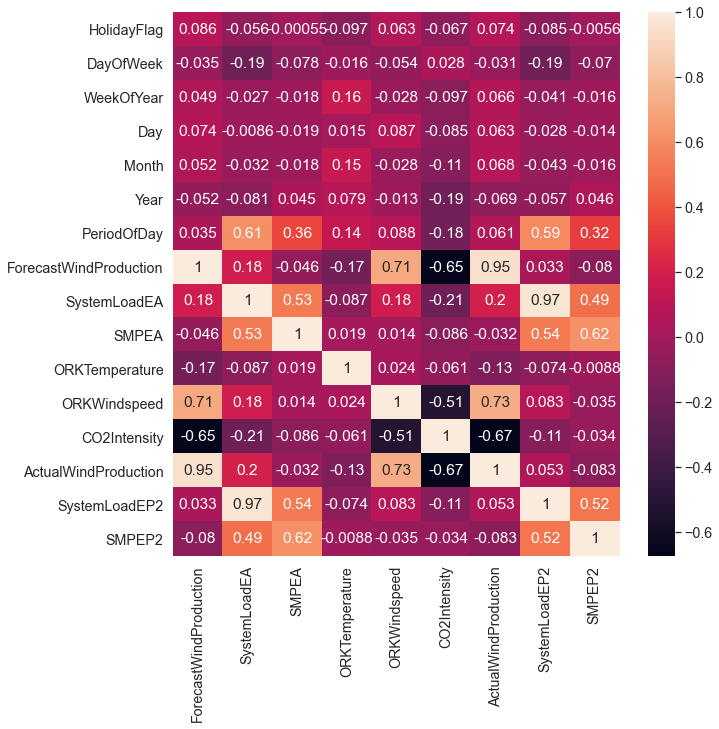

In [11]:
sns.heatmap(df.corr()[['ForecastWindProduction','SystemLoadEA','SMPEA','ORKTemperature','ORKWindspeed',
'CO2Intensity','ActualWindProduction','SystemLoadEP2','SMPEP2']], annot=True)

<AxesSubplot:>

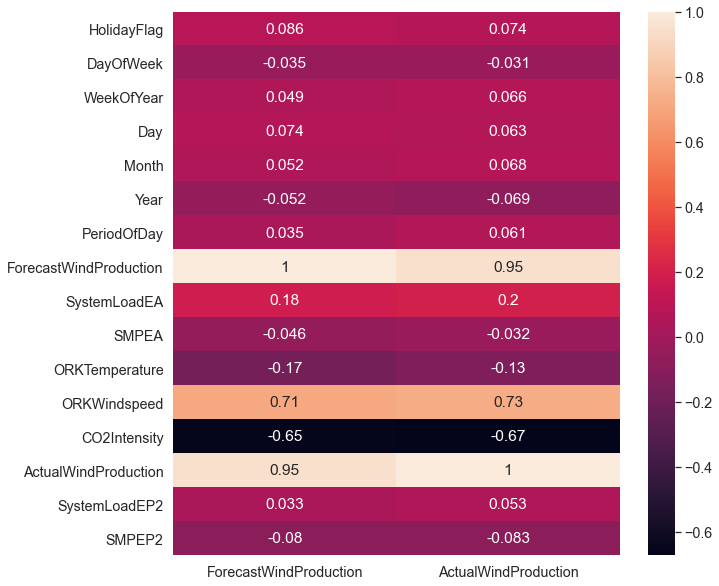

In [12]:
sns.heatmap(df.corr()[['ForecastWindProduction','ActualWindProduction']], annot=True)

<AxesSubplot:>

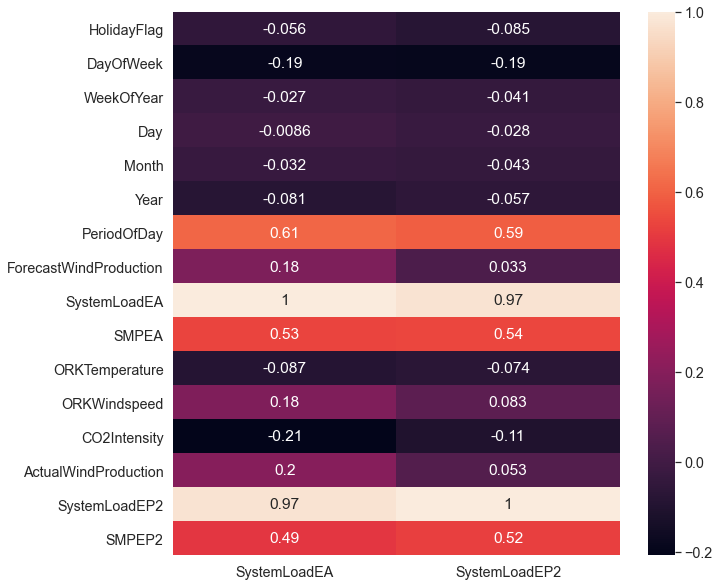

In [13]:
sns.heatmap(df.corr()[['SystemLoadEA','SystemLoadEP2']], annot=True)

In [14]:
df.groupby('HolidayFlag').describe()['SMPEP2'].transpose()

HolidayFlag             0            1
count        36478.000000  1534.000000
mean            64.177327    63.173631
std             35.405042    35.649921
min            -47.740000    18.400000
25%             45.950000    43.775000
50%             55.590000    54.175000
75%             72.047500    72.750000
max           1000.000000   487.780000

In [15]:
df[df['ORKTemperature'] == df['ORKTemperature'].max()]

DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  \
29498 2013-07-07 14:00:00    None            0          6          27    7   
29594 2013-07-09 14:00:00    None            0          1          28    9   
29637 2013-07-10 11:30:00    None            0          2          28   10   
29638 2013-07-10 12:00:00    None            0          2          28   10   
29784 2013-07-13 13:00:00    None            0          5          28   13   
29785 2013-07-13 13:30:00    None            0          5          28   13   
29786 2013-07-13 14:00:00    None            0          5          28   13   
29787 2013-07-13 14:30:00    None            0          5          28   13   
29788 2013-07-13 15:00:00    None            0          5          28   13   
29789 2013-07-13 15:30:00    None            0          5          28   13   
29790 2013-07-13 16:00:00    None            0          5          28   13   
29791 2013-07-13 16:30:00    None            0          5          28   13   
29792 2013-07-13 17:00:00    None            0          5          28   13   

       Month  Year  PeriodOfDay  ForecastWindProduction  SystemLoadEA  SMPEA  \
29498      7  2013           28                   60.90       3774.12  71.11   
29594      7  2013           28                   35.87       4382.86  99.38   
29637      7  2013           23                   20.88       4492.56  82.04   
29638      7  2013           24                   22.47       4483.49  77.14   
29784      7  2013           26                   27.94       3887.28  62.37   
29785      7  2013           27                   30.28       3838.99  62.37   
29786      7  2013           28                   33.15       3784.74  62.37   
29787      7  2013           29                   36.53       3717.82  60.80   
29788      7  2013           30                   40.48       3687.53  60.80   
29789      7  2013           31                   45.17       3671.17  60.80   
29790      7  2013           32                   50.47       3658.78  60.80   
29791      7  2013           33                   49.25       3724.86  60.80   
29792      7  2013           34                   48.24       3798.15  62.85   

       ORKTemperature  ORKWindspeed  CO2Intensity  ActualWindProduction  \
29498            25.0          11.1        571.24                  17.0   
29594            25.0          13.0        485.25                  79.0   
29637            25.0          13.0        476.26                  26.0   
29638            25.0           9.3        481.74                  32.0   
29784            25.0           3.7        517.81                  34.0   
29785            25.0           3.7        520.20                  40.0   
29786            25.0           1.9        527.72                  48.0   
29787            25.0          11.1        538.83                  53.0   
29788            25.0          14.8        542.65                  62.0   
29789            25.0          14.8        556.38                  65.0   
29790            25.0          16.7        551.91                  47.0   
29791            25.0          14.8        556.94                  50.0   
29792            25.0          13.0        576.15                  52.0   

       SystemLoadEP2  SMPEP2  
29498        3658.50   80.30  
29594        4408.18  105.65  
29637        4478.66   83.89  
29638        4492.12   81.61  
29784        3805.67   62.04  
29785        3728.42   60.03  
29786        3672.48   60.03  
29787        3627.10   60.03  
29788        3594.35   58.95  
29789        3566.72   58.49  
29790        3582.07   59.01  
29791        3606.75   60.03  
29792        3671.99   68.27

In [16]:
df.sort_values(by='ForecastWindProduction',ascending=False,).head()

DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  \
24326 2013-03-21 20:00:00    None            0          3          12   21   
24327 2013-03-21 20:30:00    None            0          3          12   21   
24325 2013-03-21 19:30:00    None            0          3          12   21   
24328 2013-03-21 21:00:00    None            0          3          12   21   
24324 2013-03-21 19:00:00    None            0          3          12   21   

       Month  Year  PeriodOfDay  ForecastWindProduction  SystemLoadEA   SMPEA  \
24326      3  2013           40                  1680.0       5457.71  155.95   
24327      3  2013           41                  1673.8       5316.00  155.95   
24325      3  2013           39                  1672.5       5582.43  188.76   
24328      3  2013           42                  1666.4       5184.10  155.95   
24324      3  2013           38                  1659.6       5623.54  205.38   

       ORKTemperature  ORKWindspeed  CO2Intensity  ActualWindProduction  \
24326             8.0          46.3        407.26                1513.0   
24327             8.0          40.7        416.32                1496.0   
24325             7.0          48.2        411.40                1522.0   
24328             9.0          37.0        416.61                1481.0   
24324             7.0          50.0        408.18                1536.0   

       SystemLoadEP2  SMPEP2  
24326        4989.04  135.59  
24327        4874.50  103.05  
24325        5173.94  137.03  
24328        4650.07   68.43  
24324        5270.63  137.03

In [17]:
df.groupby('Month').describe()['SMPEP2'].transpose()

Month           1            2            3            4            5   \
count  2976.000000  2736.000000  2972.000000  2880.000000  2976.000000   
mean     61.968347    63.953640    73.775501    67.856611    62.808505   
std      45.372725    39.318872    43.921858    28.687375    23.764920   
min     -47.740000    23.230000    24.020000    13.940000     5.030000   
25%      41.620000    45.200000    49.350000    49.887500    46.750000   
50%      49.180000    52.480000    59.775000    63.020000    59.210000   
75%      66.100000    67.115000    84.270000    77.795000    73.282500   
max     630.190000  1000.000000   699.490000   675.580000   368.580000   

Month           6            7            8            9            10  \
count  2880.000000  2976.000000  2976.000000  2880.000000  2976.000000   
mean     57.404774    61.379556    61.546986    65.650163    64.658112   
std      23.783125    22.009667    26.082096    27.486247    36.598213   
min      17.060000    25.050000     0.030000    22.500000    10.000000   
25%      44.020000    46.760000    46.307500    48.917500    45.360000   
50%      54.140000    56.780000    56.995000    61.560000    58.065000   
75%      65.852500    73.600000    74.220000    78.640000    73.800000   
max     442.860000   200.450000   464.950000   603.000000   657.080000   

Month           11           12  
count  4320.000000  4464.000000  
mean     65.750597    62.785679  
std      44.123182    40.563906  
min       0.000000    -3.500000  
25%      45.660000    43.280000  
50%      53.630000    53.060000  
75%      65.960000    67.232500  
max     682.850000   493.600000

In [18]:
df.groupby('Year').describe()['ActualWindProduction'].transpose()

Year          2011          2012          2013
count  2928.000000  17565.000000  17516.000000
mean    788.101776    467.055565    529.931548
std     383.887455    336.564998    396.713307
min      36.000000      1.000000      3.000000
25%     486.000000    185.000000    192.000000
50%     817.000000    401.000000    444.000000
75%    1117.000000    691.000000    820.000000
max    1474.000000   1493.000000   1769.000000

In [19]:
df.groupby('Year').describe()['ForecastWindProduction'].transpose()

Year          2011          2012          2013
count  2928.000000  17565.000000  17516.000000
mean    824.286315    480.174769    561.718048
std     402.686626    367.274854    438.964989
min      39.620000      3.900000      0.680000
25%     480.057500    174.500000    181.615000
50%     865.330000    385.420000    448.795000
75%    1172.425000    713.700000    879.300000
max    1522.580000   1565.200000   1680.000000

In [20]:
df[df['ForecastWindProduction'] == df['ActualWindProduction']].head()

DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  \
4859  2012-02-10 05:30:00    None            0          4           6   10   
14315 2012-08-25 06:30:00    None            0          5          34   25   
15877 2012-09-26 19:30:00    None            0          2          39   26   
16693 2012-10-13 19:30:00    None            0          5          41   13   
19222 2012-12-05 12:00:00    None            0          2          49    5   

       Month  Year  PeriodOfDay  ForecastWindProduction  SystemLoadEA   SMPEA  \
4859       2  2012           11                    52.0       3429.63   49.29   
14315      8  2012           13                   396.0       2514.76   40.72   
15877      9  2012           39                   859.0       4879.32   92.77   
16693     10  2012           39                   179.0       4703.92  124.73   
19222     12  2012           24                   118.0       5241.10   61.57   

       ORKTemperature  ORKWindspeed  CO2Intensity  ActualWindProduction  \
4859              9.0          13.0        695.24                  52.0   
14315            13.0          31.5        495.99                 396.0   
15877            12.0          25.9        414.09                 859.0   
16693             8.0           7.4        429.94                 179.0   
19222             4.0          22.2        527.72                 118.0   

       SystemLoadEP2  SMPEP2  
4859         3233.42   54.16  
14315        2390.91   47.42  
15877        4624.97  123.28  
16693        4498.62  157.61  
19222        5057.76   74.53

# Data Visualization

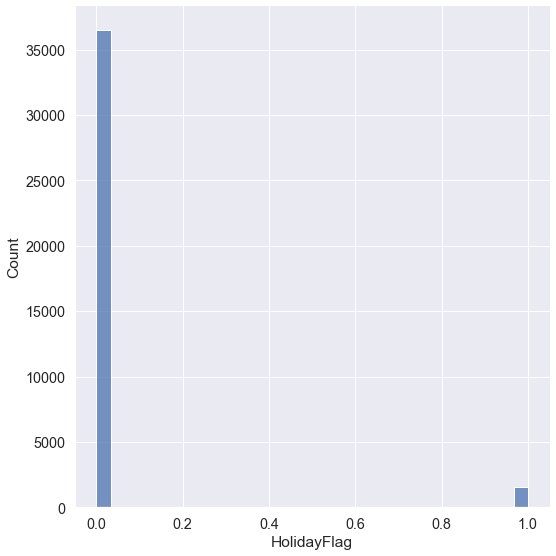

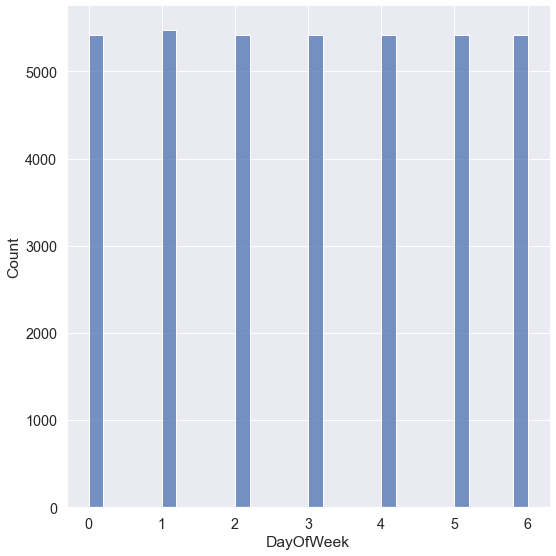

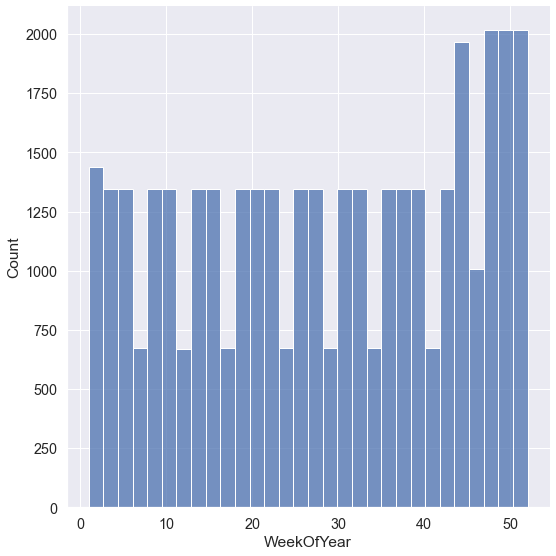

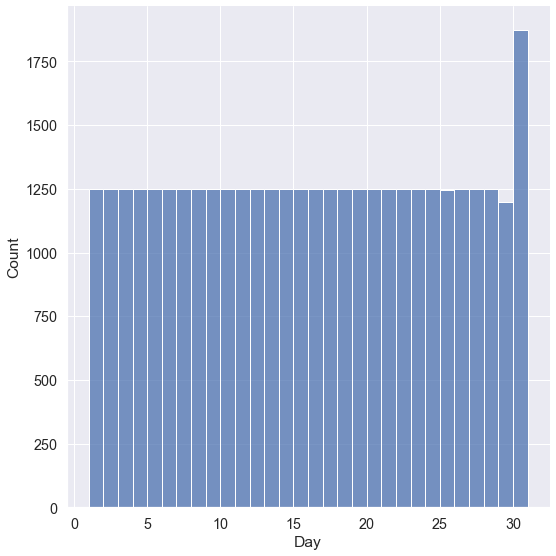

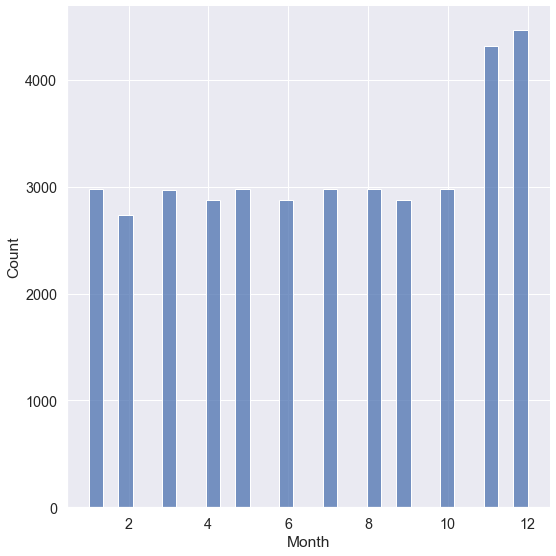

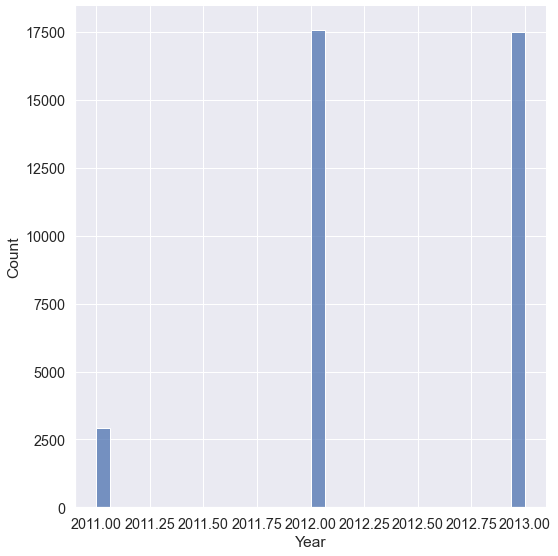

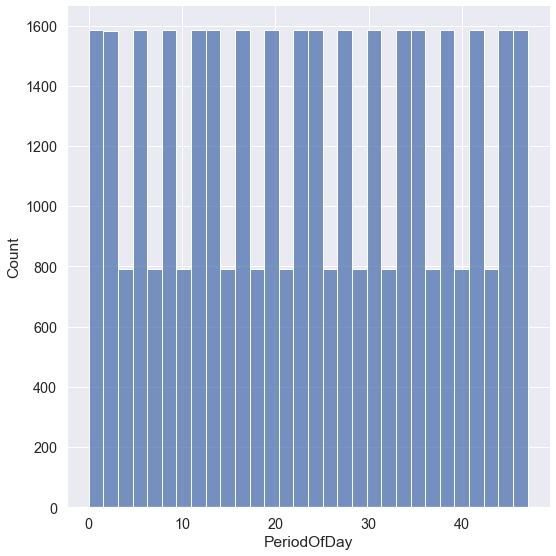

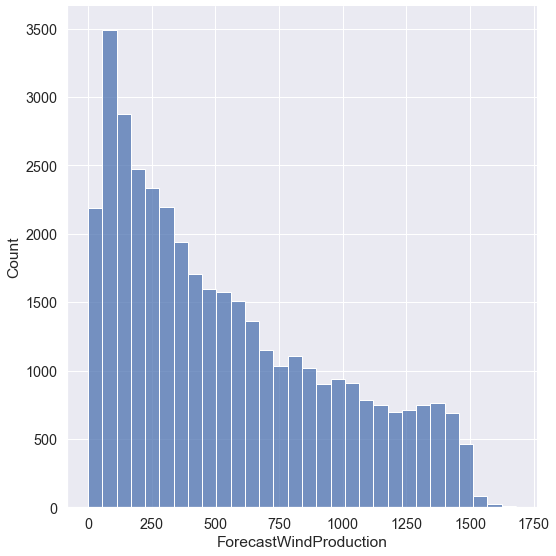

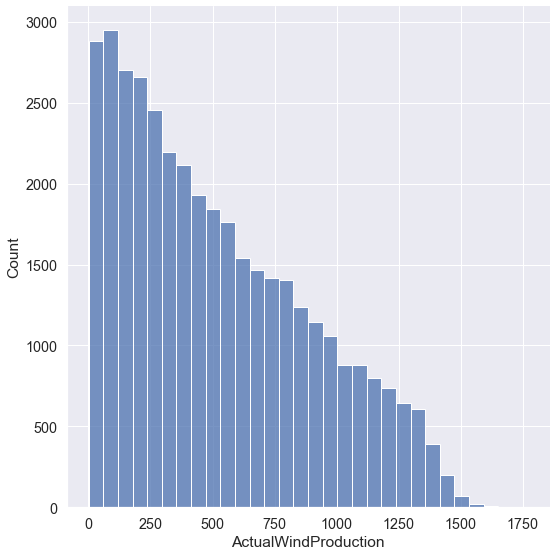

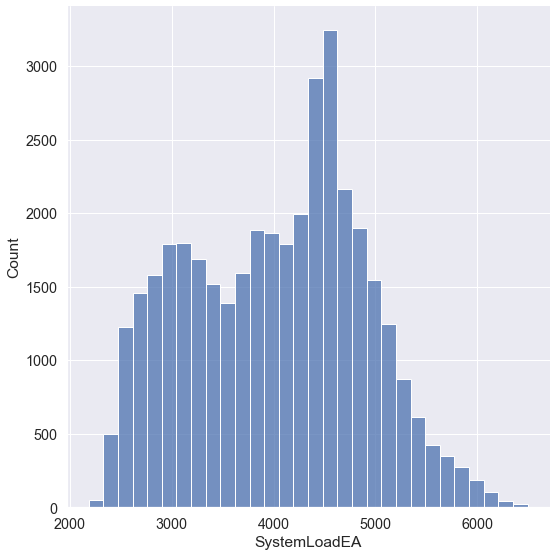

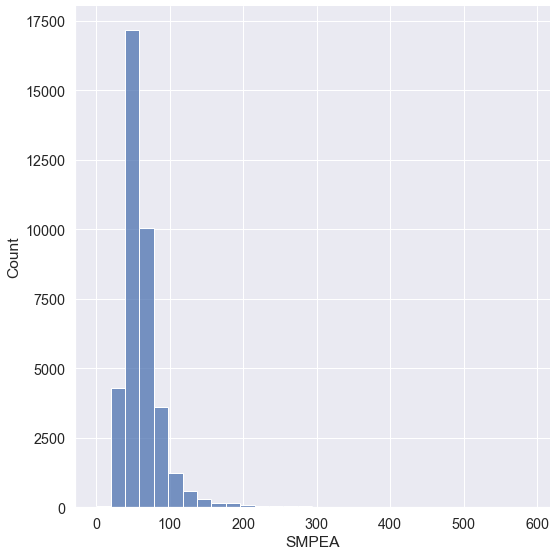

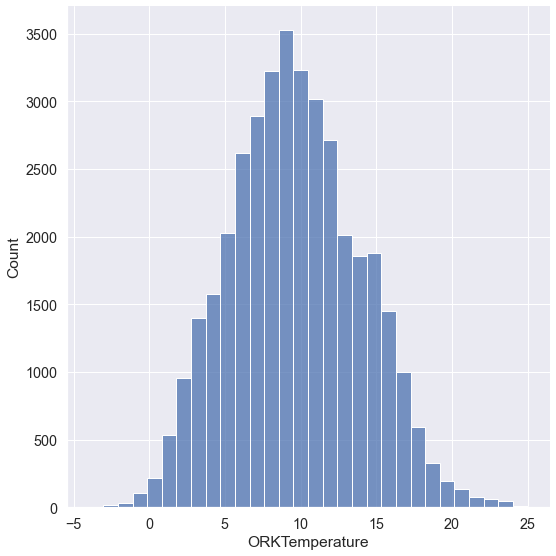

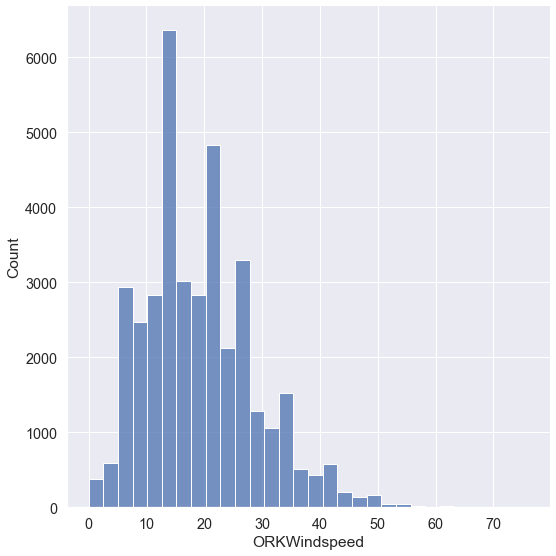

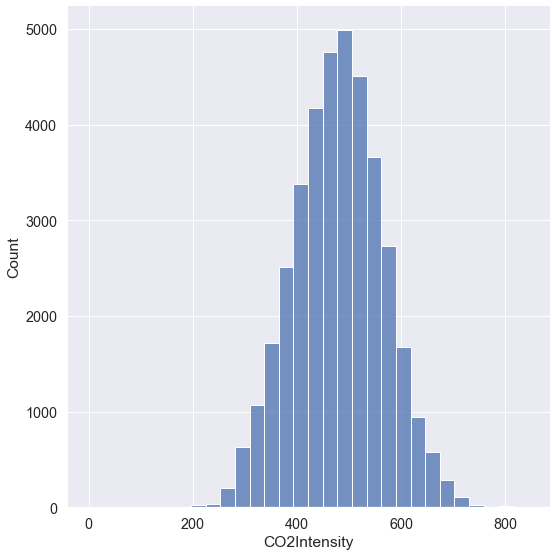

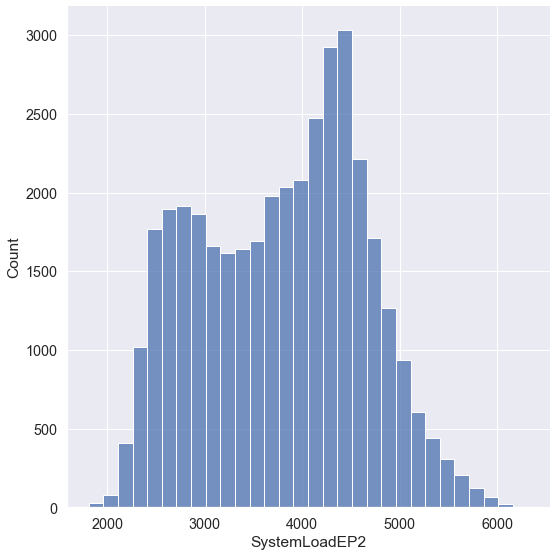

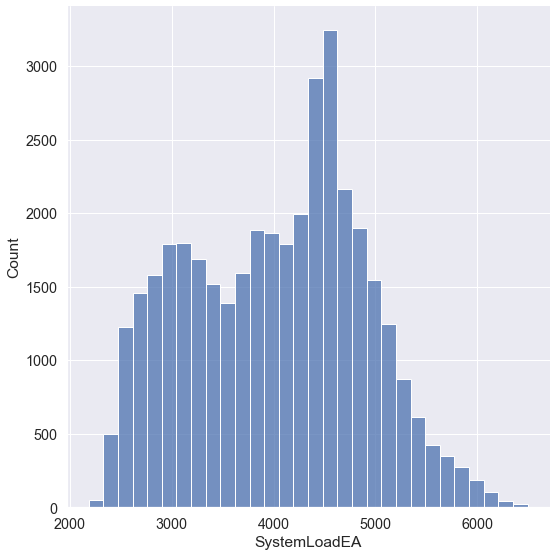

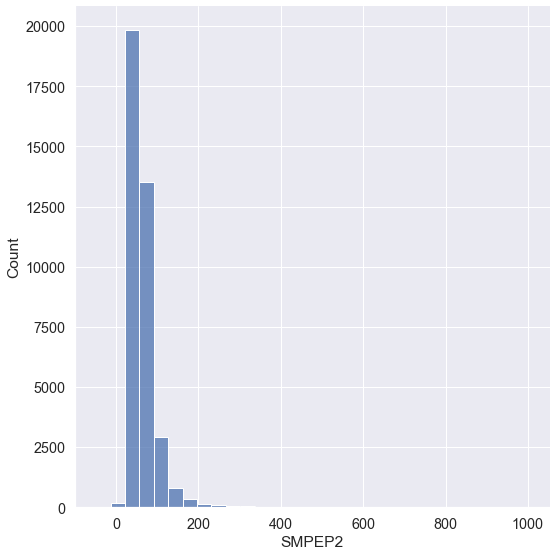

In [21]:
data_Numeric = ['HolidayFlag','DayOfWeek','WeekOfYear','Day','Month','Year','PeriodOfDay','ForecastWindProduction',
'ActualWindProduction','SystemLoadEA','SMPEA','ORKTemperature','ORKWindspeed','CO2Intensity','SystemLoadEP2','SystemLoadEA','SMPEP2']
for col in data_Numeric:
    sns.displot(df[col],height=8,bins=30)

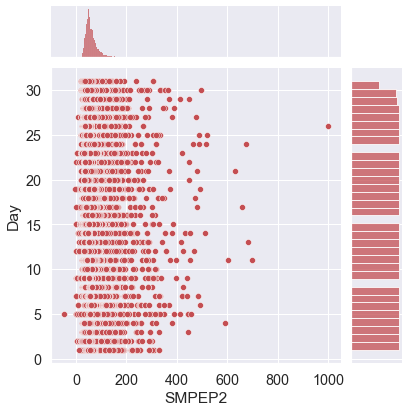

In [22]:
sns.jointplot(data = df,x = 'SMPEP2' ,y ='Day',color='r')

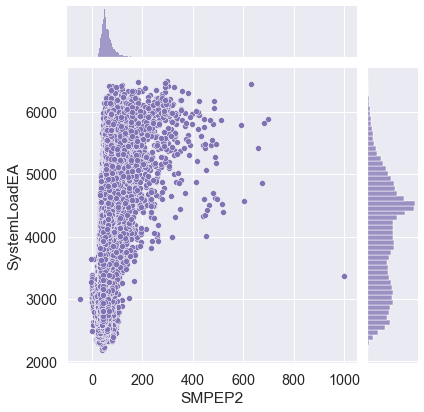

In [23]:
sns.jointplot(data = df,x = 'SMPEP2' ,y ='SystemLoadEA',color='m')

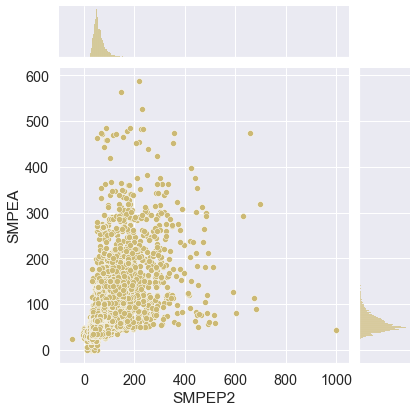

In [24]:
sns.jointplot(data = df,x = 'SMPEP2' ,y ='SMPEA',color='y')

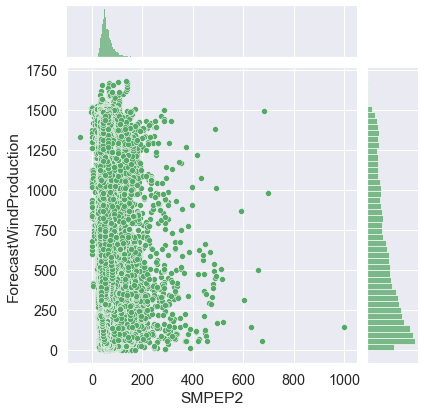

In [25]:
sns.jointplot(data = df,x = 'SMPEP2' ,y ='ForecastWindProduction',color='g')

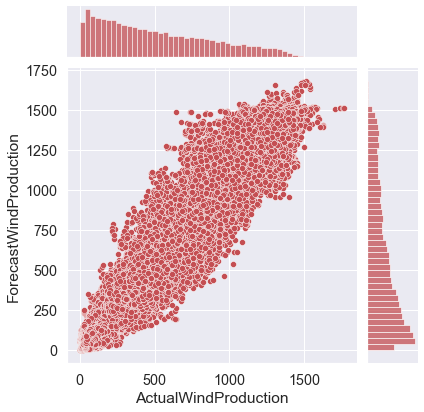

In [26]:
sns.jointplot(data = df,x = 'ActualWindProduction' ,y ='ForecastWindProduction',color='r')

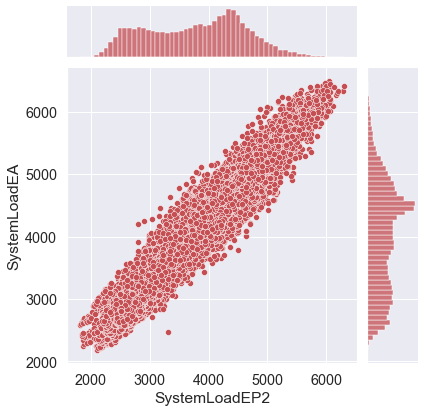

In [27]:
sns.jointplot(data = df,x = 'SystemLoadEP2' ,y ='SystemLoadEA',color='r')

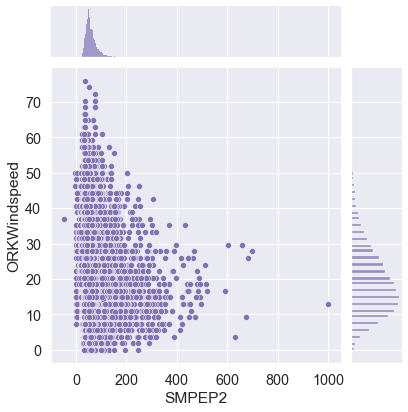

In [28]:
sns.jointplot(data = df,x = 'SMPEP2' ,y ='ORKWindspeed',color='m')

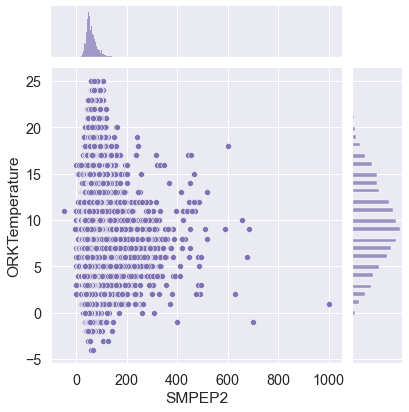

In [29]:
sns.jointplot(data = df,x = 'SMPEP2' ,y ='ORKTemperature',color='m')

<AxesSubplot:xlabel='count', ylabel='Holiday'>

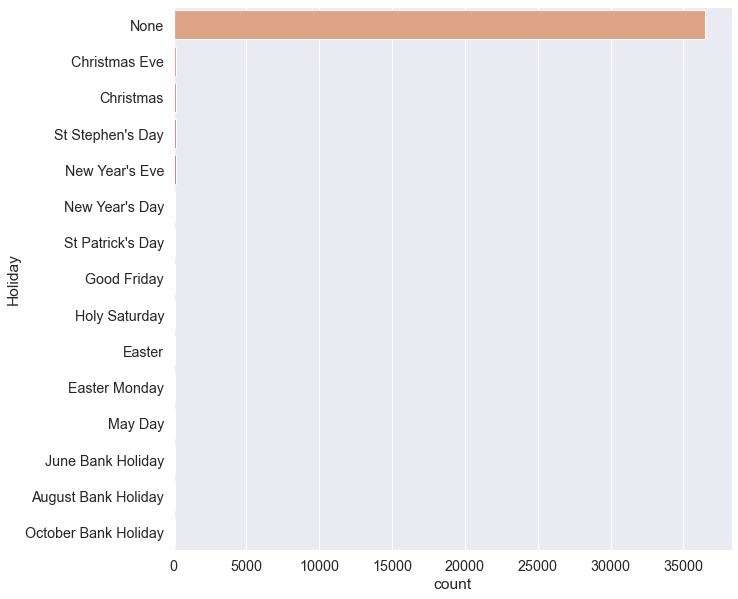

In [30]:
sns.countplot(y='Holiday', data=df, palette='flare')

<AxesSubplot:xlabel='Day', ylabel='count'>

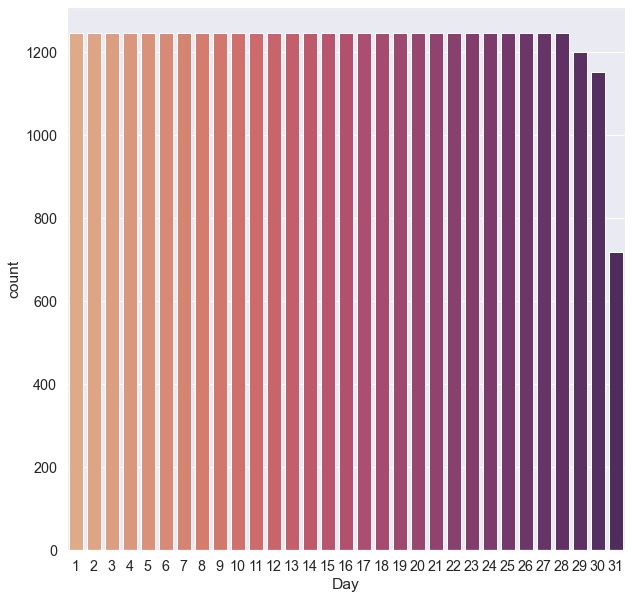

In [31]:
sns.countplot(x='Day', data=df, palette='flare')

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

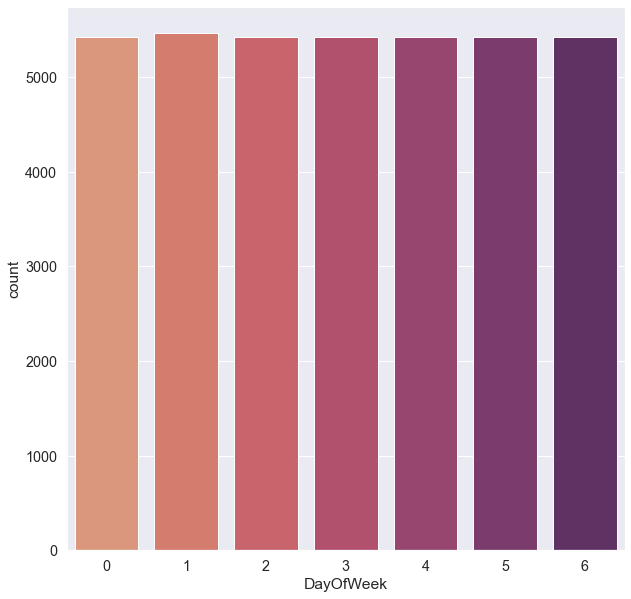

In [32]:
sns.countplot(x='DayOfWeek', data=df, palette='flare')

<AxesSubplot:xlabel='Month', ylabel='count'>

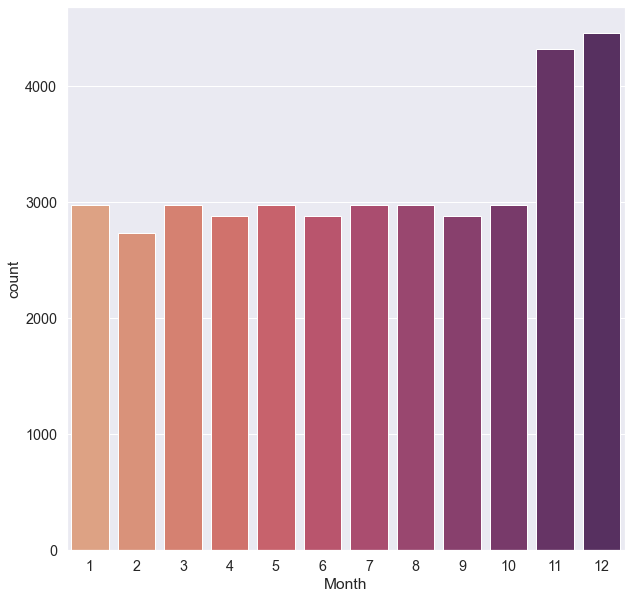

In [33]:
sns.countplot(x='Month', data=df, palette='flare')

<AxesSubplot:xlabel='Year', ylabel='count'>

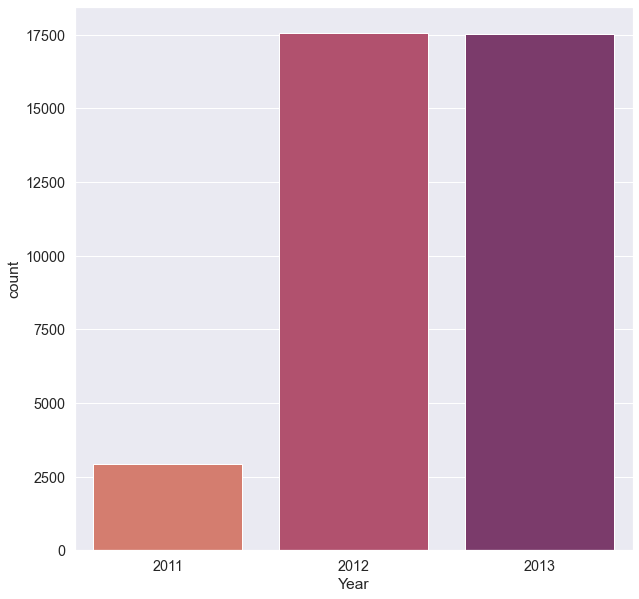

In [34]:
sns.countplot(x='Year', data=df, palette='flare')

<AxesSubplot:xlabel='HolidayFlag', ylabel='count'>

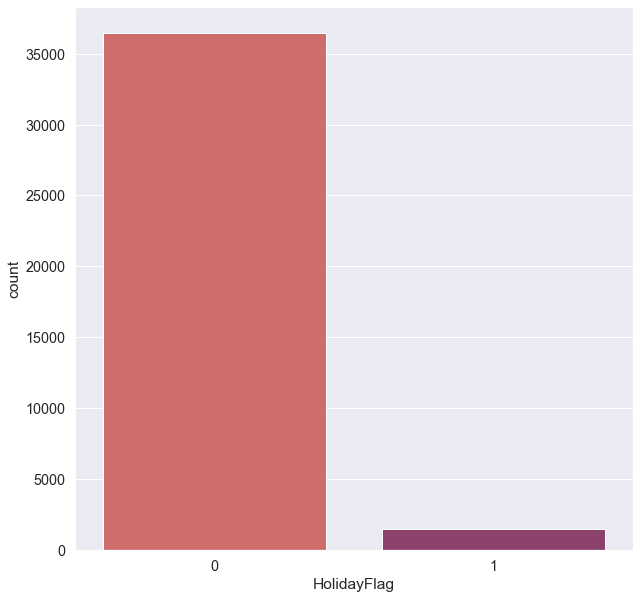

In [35]:
sns.countplot(x='HolidayFlag', data=df, palette='flare')

<AxesSubplot:xlabel='PeriodOfDay', ylabel='count'>

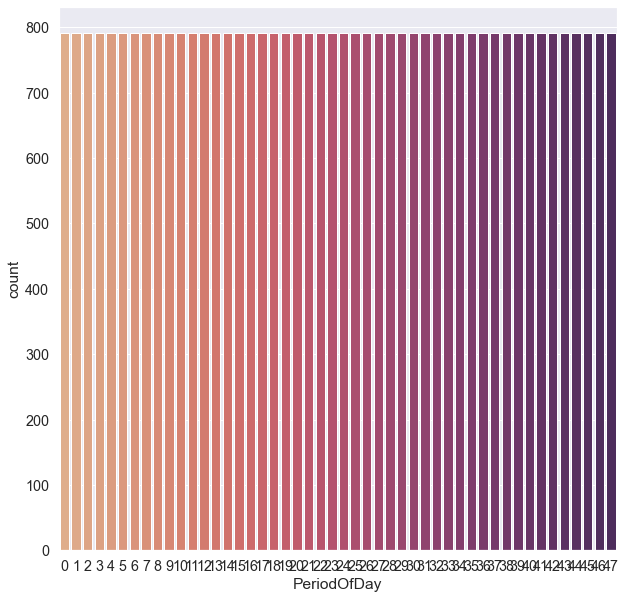

In [36]:
sns.countplot(x='PeriodOfDay', data=df, palette='flare')

<AxesSubplot:xlabel='DayOfWeek', ylabel='ForecastWindProduction'>

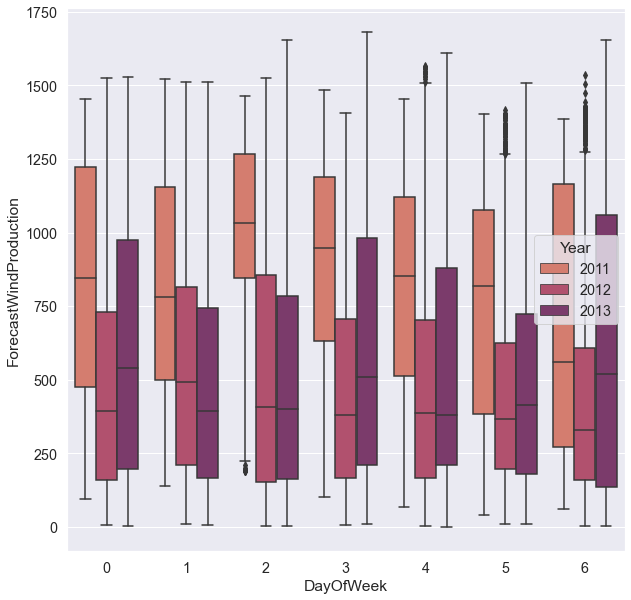

In [37]:
sns.boxplot(x='DayOfWeek', y='ForecastWindProduction', data=df, palette='flare',hue='Year')

<AxesSubplot:xlabel='DayOfWeek', ylabel='ActualWindProduction'>

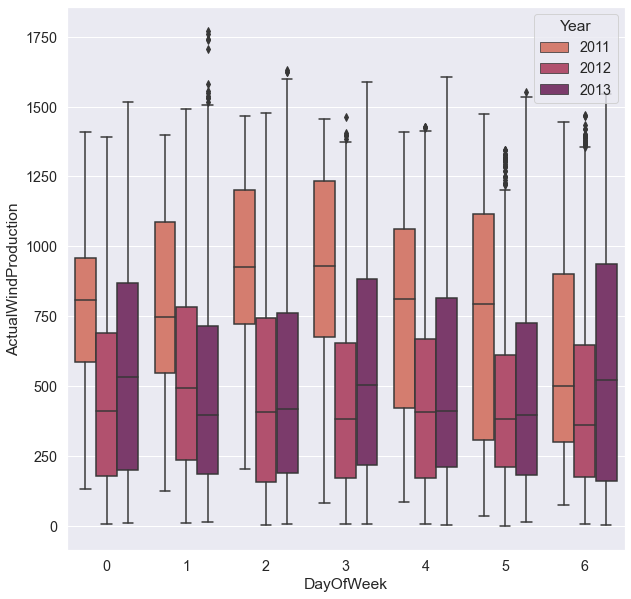

In [38]:
sns.boxplot(x='DayOfWeek', y='ActualWindProduction', data=df, palette='flare',hue='Year')

<AxesSubplot:xlabel='DayOfWeek', ylabel='SystemLoadEA'>

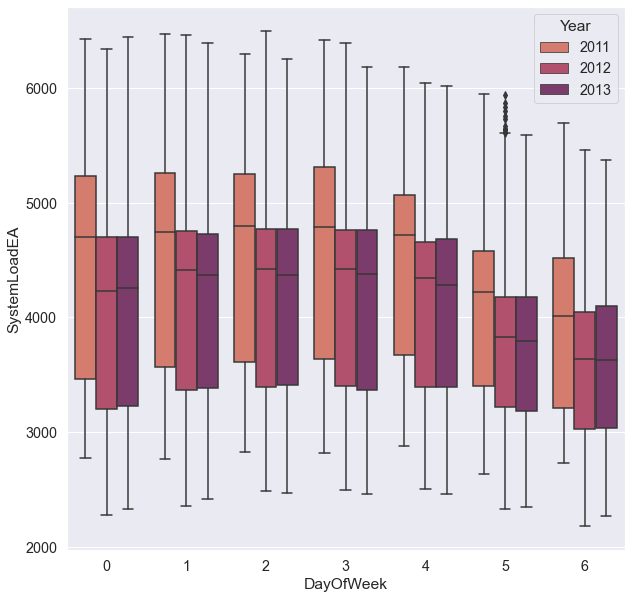

In [39]:
sns.boxplot(x='DayOfWeek', y='SystemLoadEA', data=df, palette='flare',hue='Year')

<AxesSubplot:xlabel='DayOfWeek', ylabel='SMPEP2'>

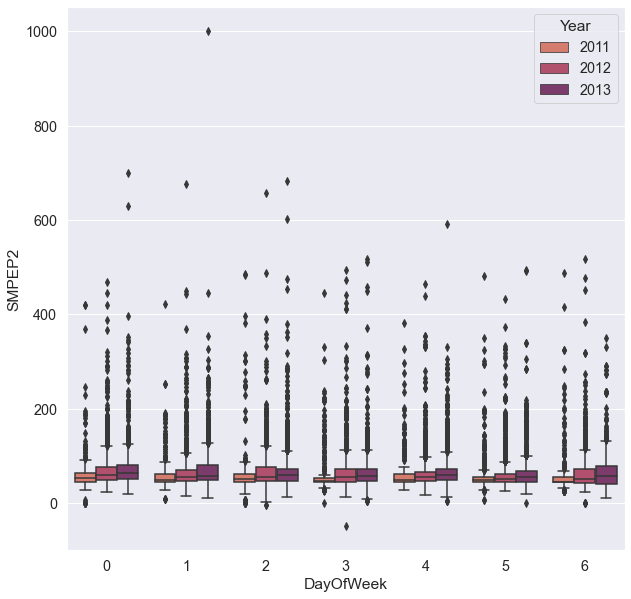

In [40]:
sns.boxplot(x='DayOfWeek', y='SMPEP2', data=df, palette='flare',hue='Year')

<AxesSubplot:xlabel='DayOfWeek', ylabel='ORKWindspeed'>

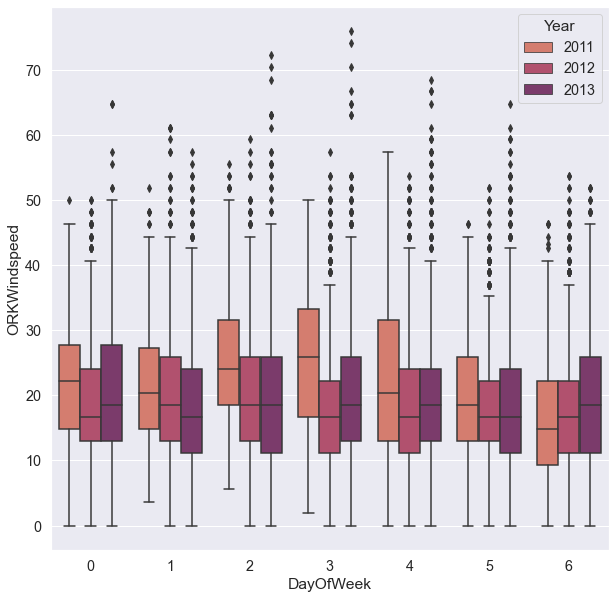

In [41]:
sns.boxplot(x='DayOfWeek', y='ORKWindspeed', data=df, palette='flare',hue='Year')

<AxesSubplot:xlabel='DayOfWeek', ylabel='ORKTemperature'>

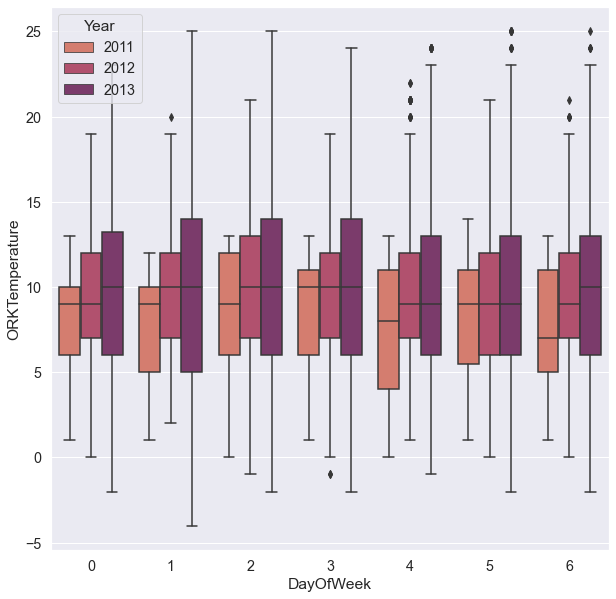

In [42]:
sns.boxplot(x='DayOfWeek', y='ORKTemperature', data=df, palette='flare',hue='Year')

<AxesSubplot:xlabel='Year', ylabel='ORKTemperature'>

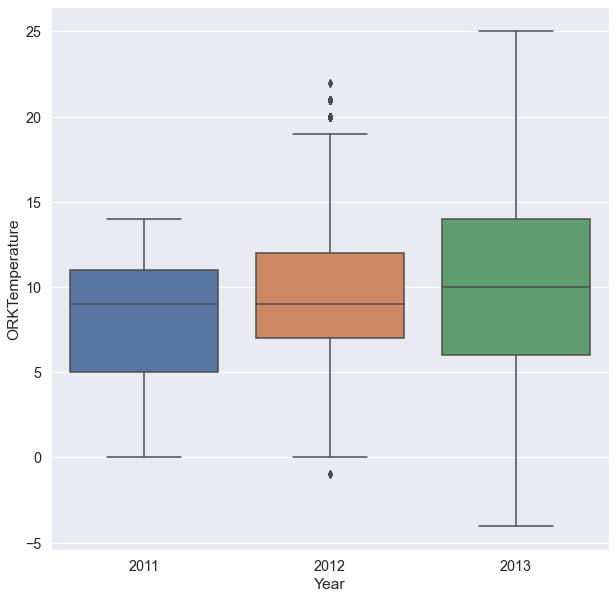

In [43]:
sns.boxplot(x='Year', y='ORKTemperature', data=df)

<AxesSubplot:xlabel='Year', ylabel='SMPEP2'>

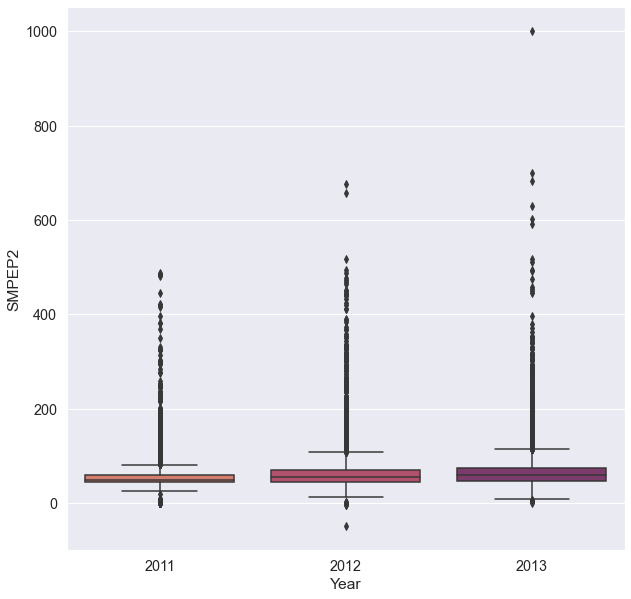

In [44]:
sns.boxplot(x='Year', y='SMPEP2', data=df, palette='flare')

<AxesSubplot:xlabel='Year', ylabel='SMPEA'>

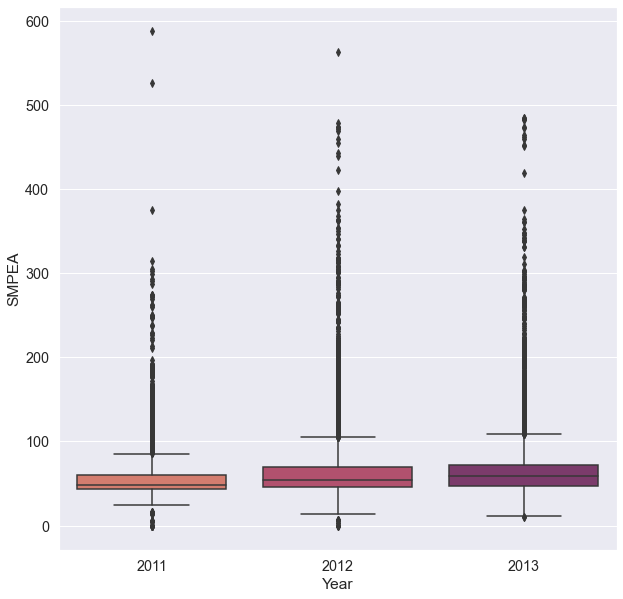

In [45]:
sns.boxplot(x='Year', y='SMPEA', data=df, palette='flare')

<AxesSubplot:xlabel='Year', ylabel='SystemLoadEA'>

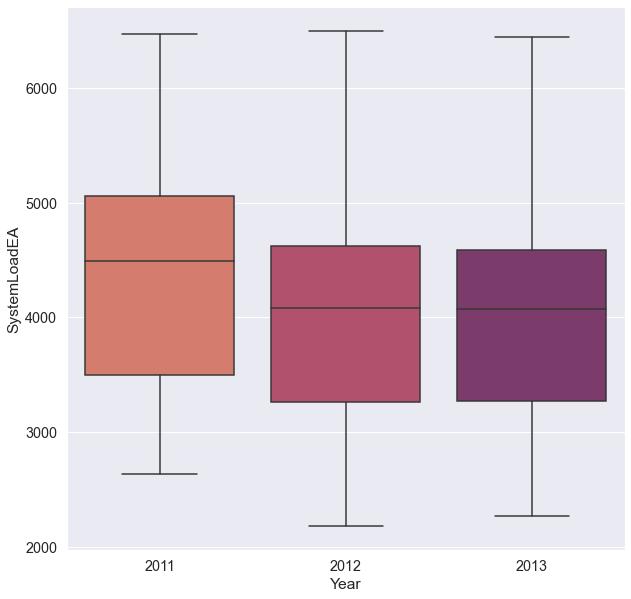

In [46]:
sns.boxplot(x='Year', y='SystemLoadEA', data=df, palette='flare')

<AxesSubplot:xlabel='Year', ylabel='ORKWindspeed'>

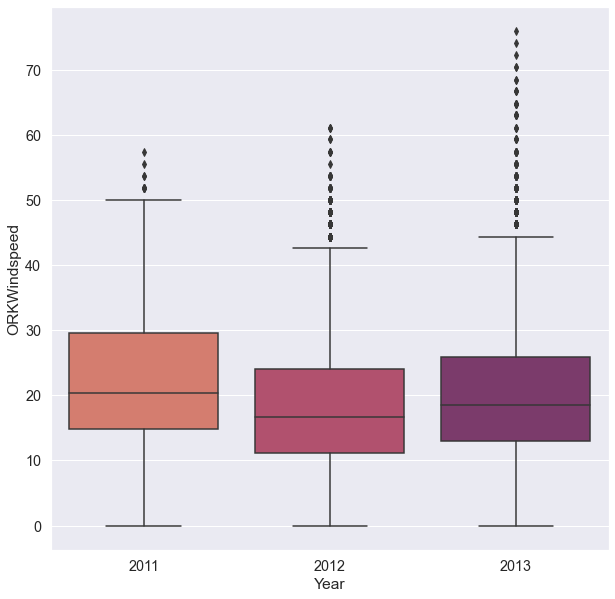

In [47]:
sns.boxplot(x='Year', y='ORKWindspeed', data=df, palette='flare')

<AxesSubplot:xlabel='Year', ylabel='ActualWindProduction'>

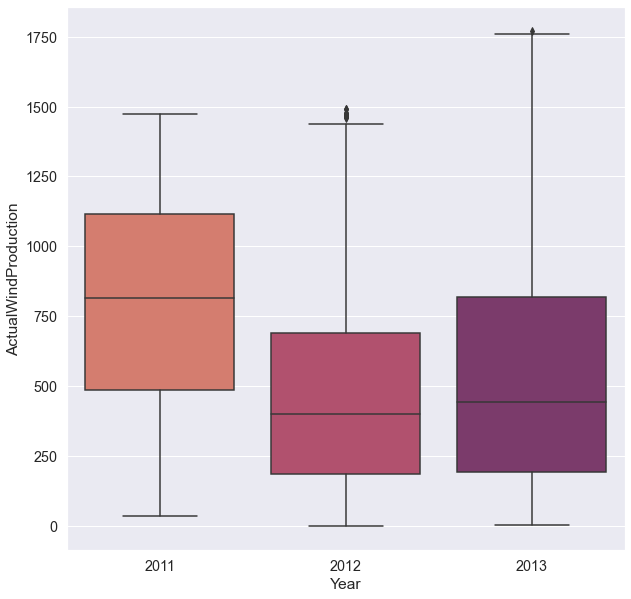

In [48]:
sns.boxplot(x='Year', y='ActualWindProduction', data=df, palette='flare')

<AxesSubplot:xlabel='Year', ylabel='ForecastWindProduction'>

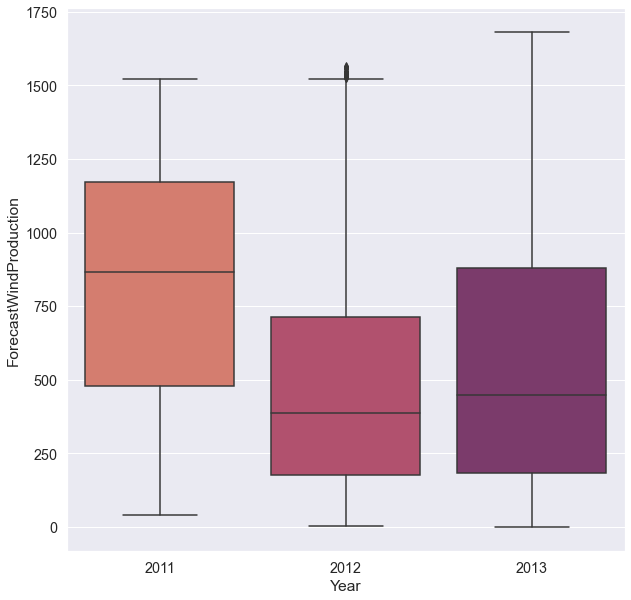

In [49]:
sns.boxplot(x='Year', y='ForecastWindProduction', data=df, palette='flare')


<AxesSubplot:xlabel='PeriodOfDay', ylabel='SMPEA'>

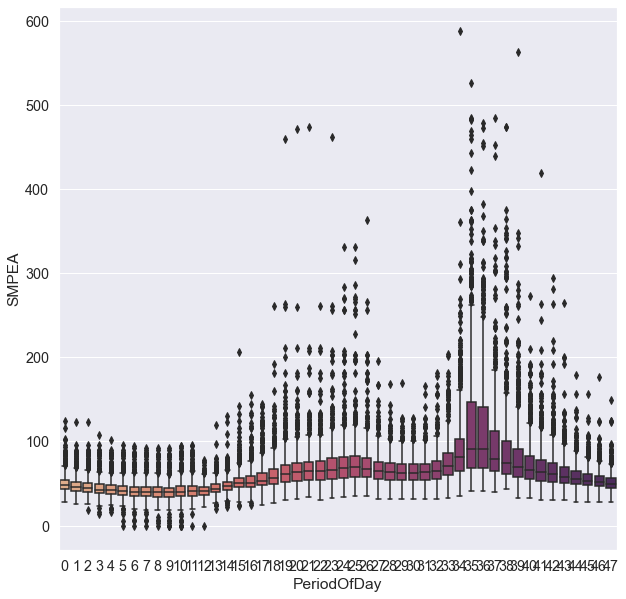

In [50]:
sns.boxplot(x='PeriodOfDay', y='SMPEA', data=df, palette='flare')

<AxesSubplot:xlabel='PeriodOfDay', ylabel='SystemLoadEP2'>

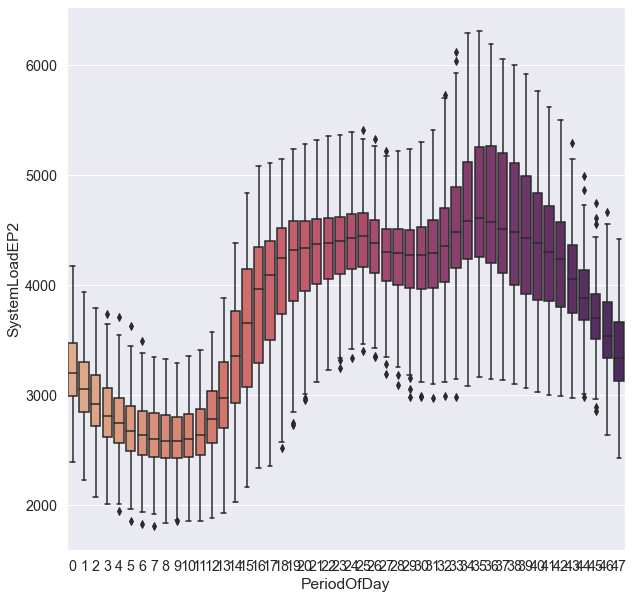

In [51]:
sns.boxplot(x='PeriodOfDay', y='SystemLoadEP2', data=df, palette='flare')

<AxesSubplot:xlabel='PeriodOfDay', ylabel='CO2Intensity'>

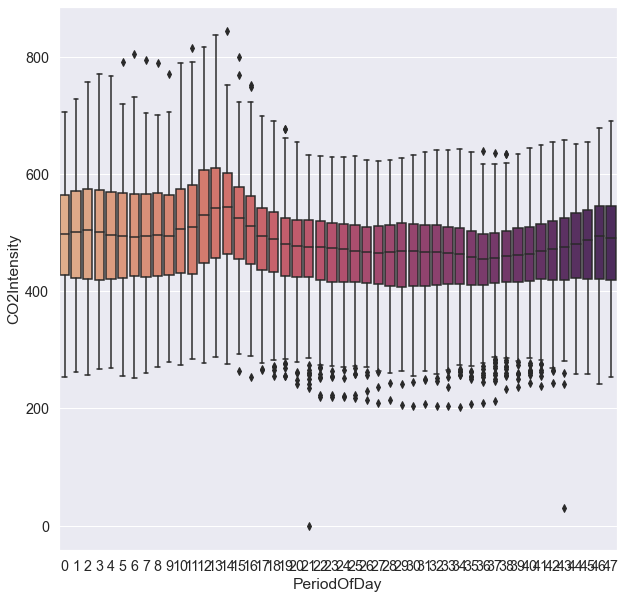

In [52]:
sns.boxplot(x='PeriodOfDay', y='CO2Intensity', data=df, palette='flare')

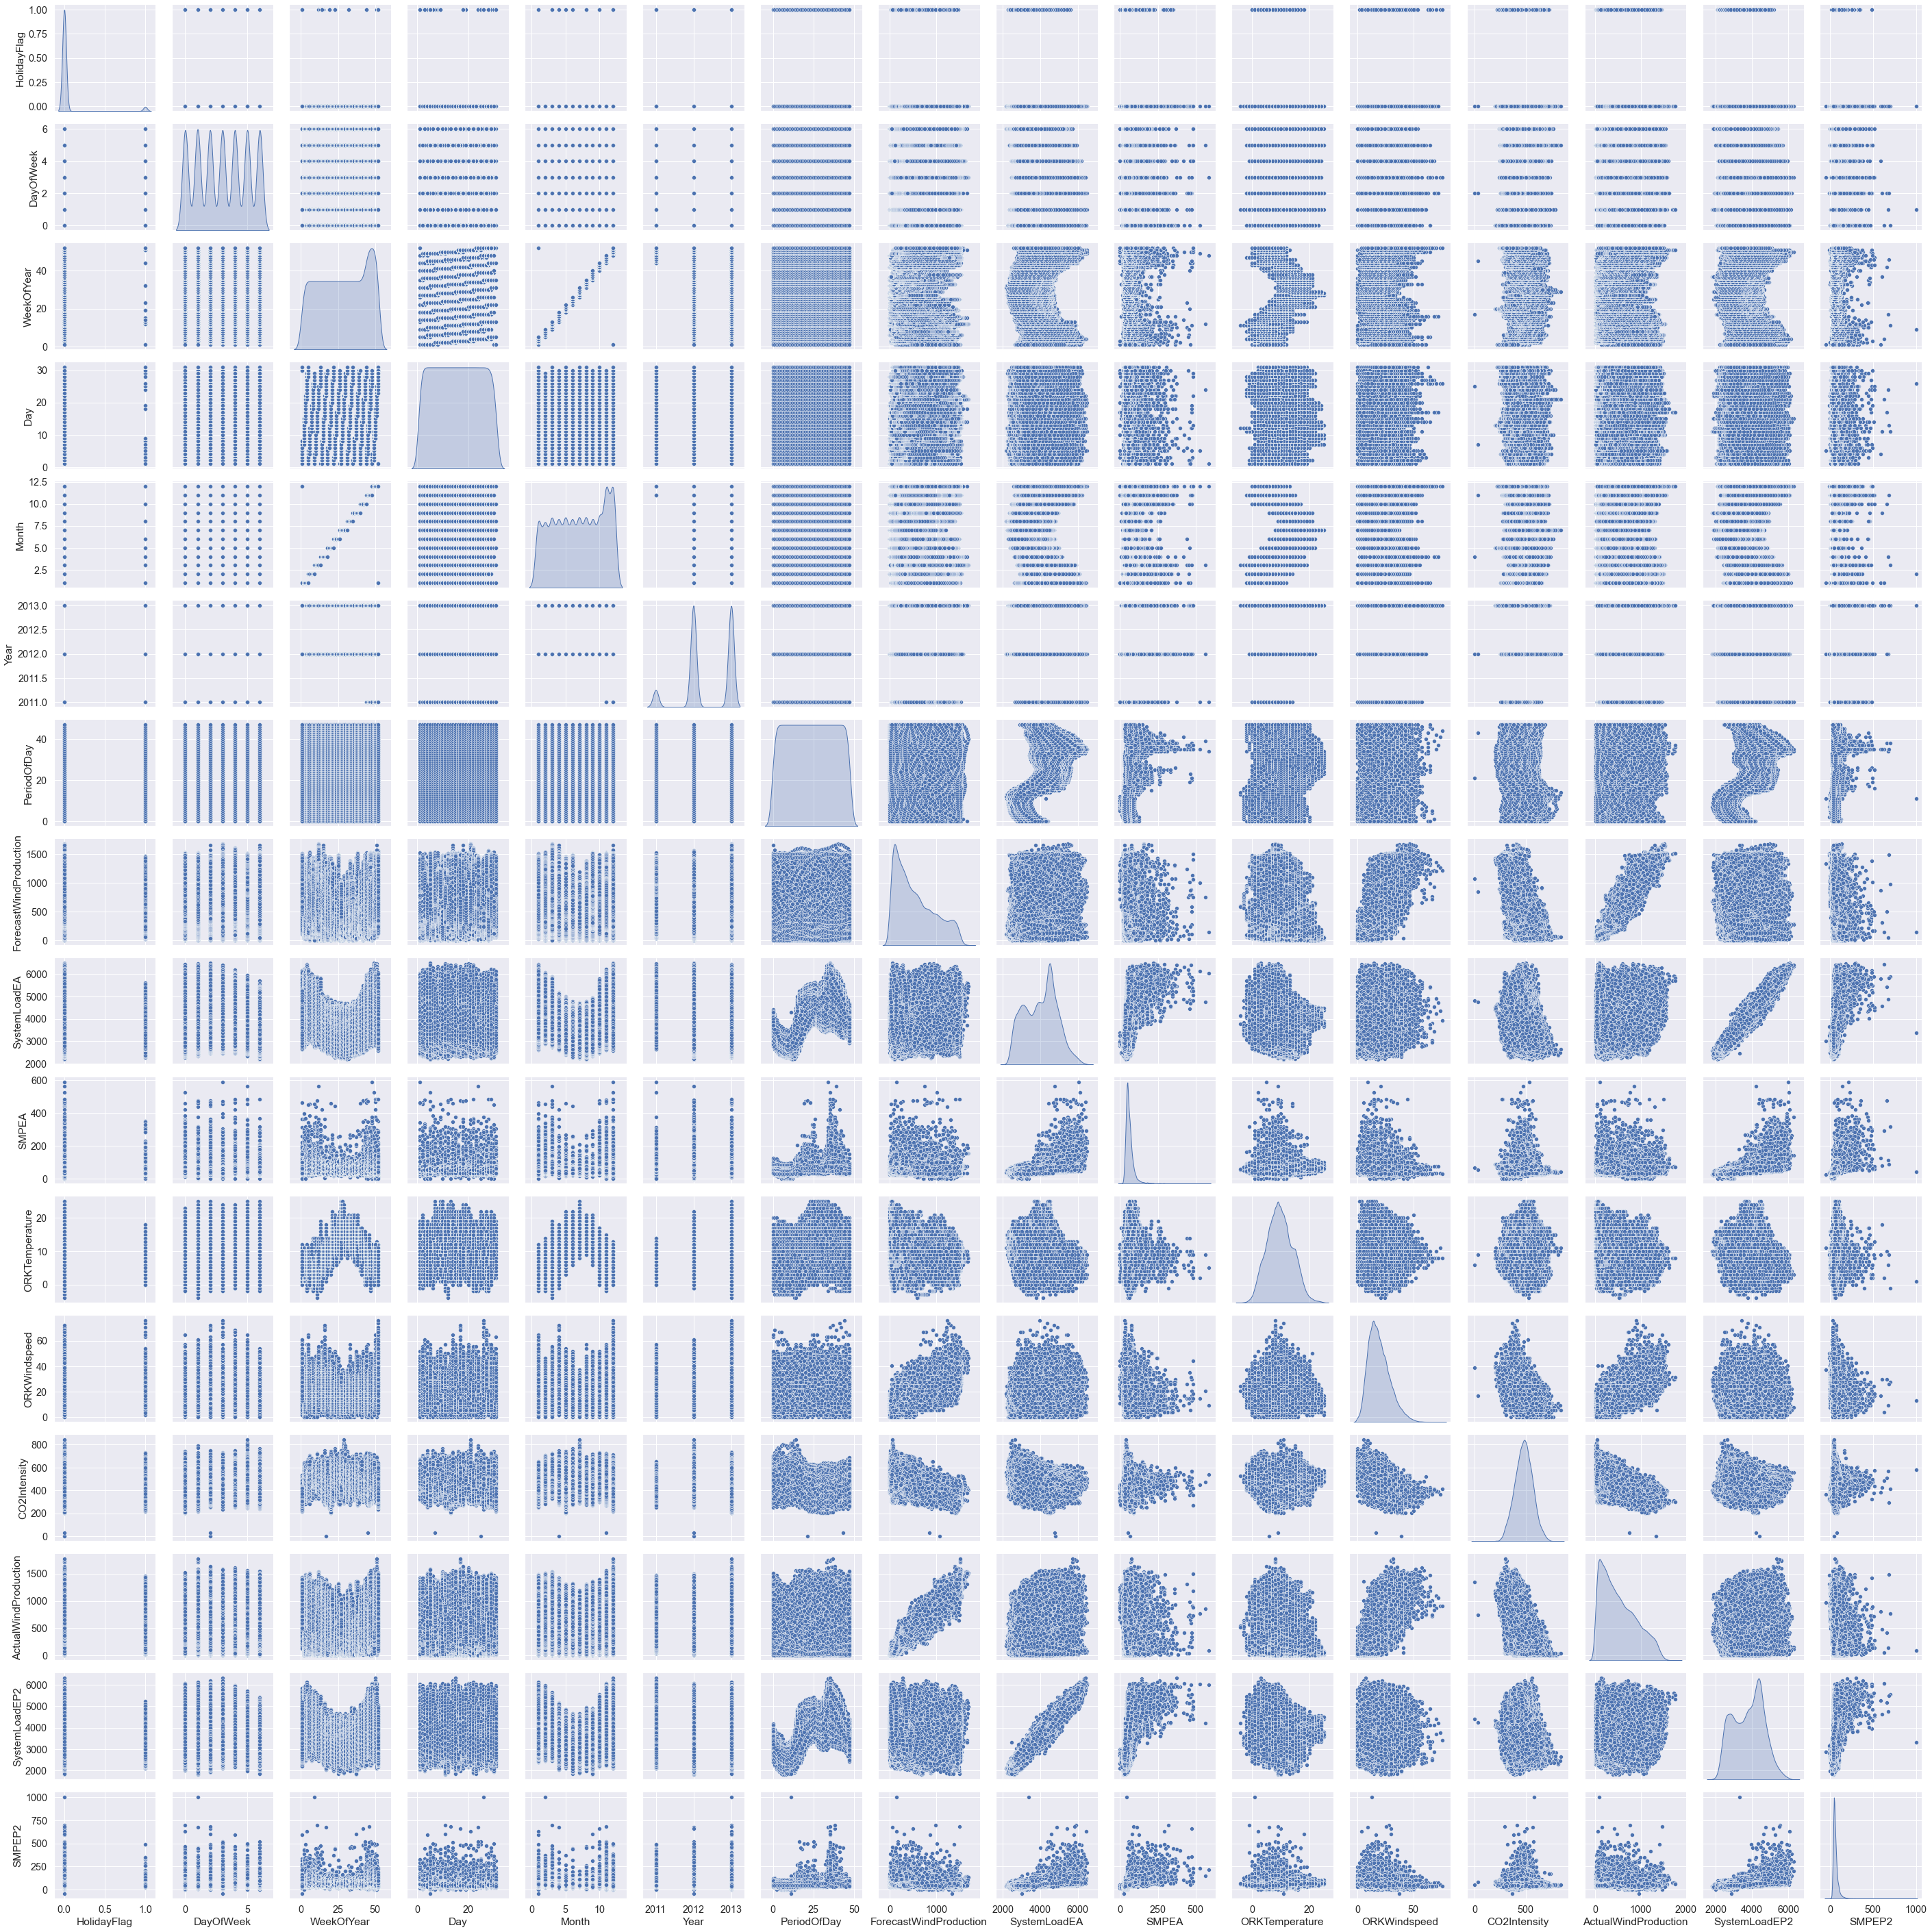

In [53]:
sns.pairplot(df,diag_kind='kde')

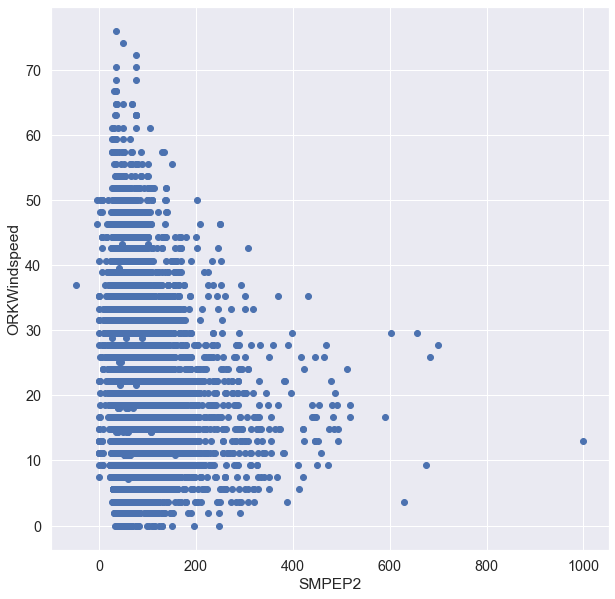

In [54]:
plt.scatter(x= df['SMPEP2'],y=df['ORKWindspeed'])
plt.xlabel('SMPEP2')
plt.ylabel('ORKWindspeed')
plt.show()

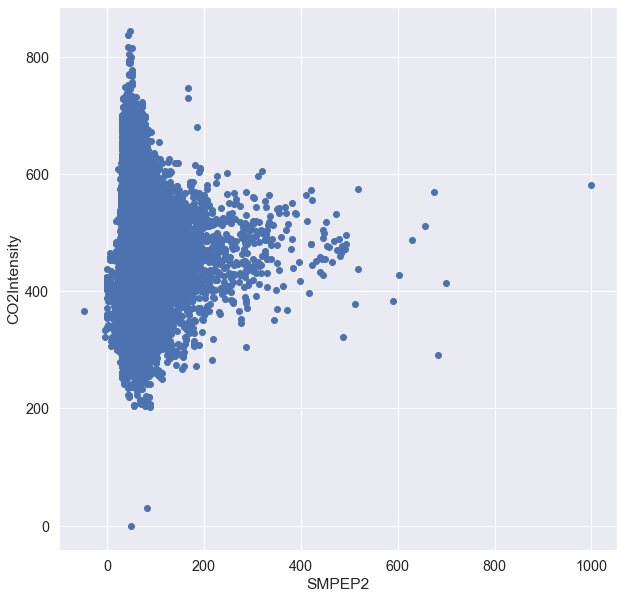

In [55]:
plt.scatter(x= df['SMPEP2'],y=df['CO2Intensity'])
plt.xlabel('SMPEP2')
plt.ylabel('CO2Intensity')
plt.show()

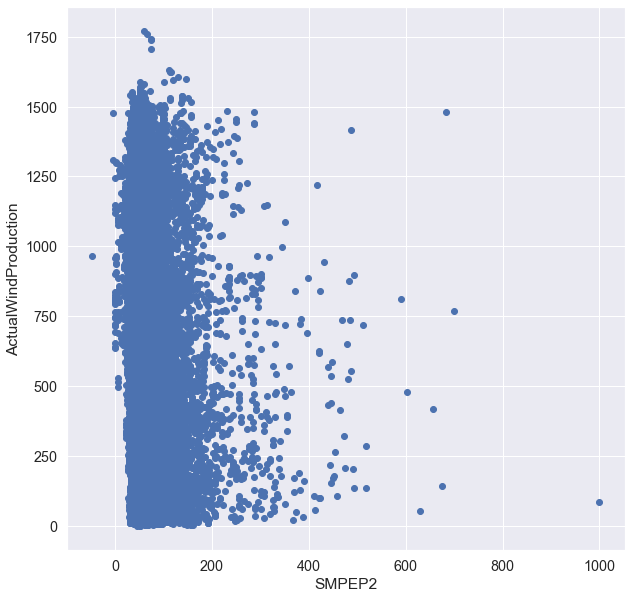

In [56]:
plt.scatter(x= df['SMPEP2'],y=df['ActualWindProduction'])
plt.xlabel('SMPEP2')
plt.ylabel('ActualWindProduction')
plt.show()

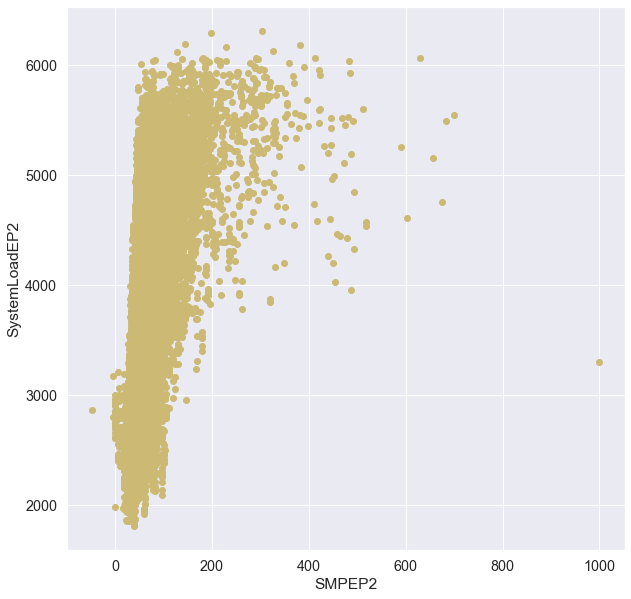

In [57]:
plt.scatter(x= df['SMPEP2'],y=df['SystemLoadEP2'],c='y')
plt.xlabel('SMPEP2')
plt.ylabel('SystemLoadEP2')
plt.show()

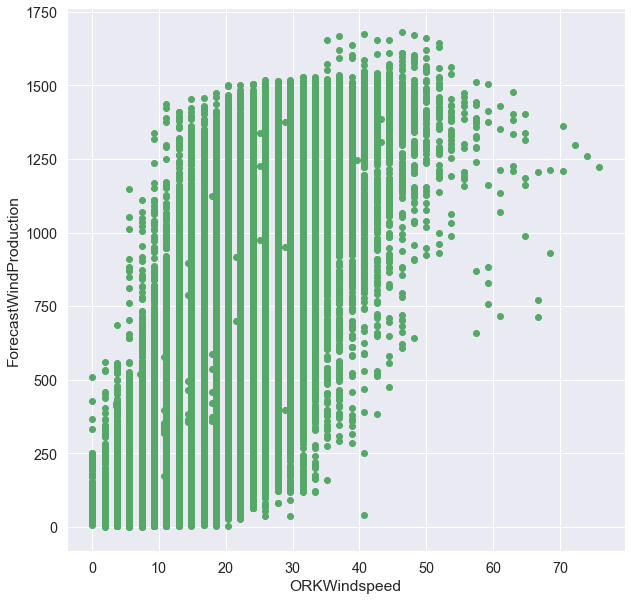

In [58]:
plt.scatter(x= df['ORKWindspeed'],y=df['ForecastWindProduction'],c='g')
plt.xlabel('ORKWindspeed')
plt.ylabel('ForecastWindProduction')
plt.show()

# Data preprocessing

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 38014 non-null  object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  38009 non-null  float64       
 10  SystemLoadEA            38012 non-null  float64       
 11  SMPEA                   38012 non-null  float64       
 12  ORKTemperature          37719 non-null  float6

In [60]:
df[df['Holiday'] =='None']

DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  \
0     2011-11-01 00:00:00    None            0          1          44    1   
1     2011-11-01 00:30:00    None            0          1          44    1   
2     2011-11-01 01:00:00    None            0          1          44    1   
3     2011-11-01 01:30:00    None            0          1          44    1   
4     2011-11-01 02:00:00    None            0          1          44    1   
...                   ...     ...          ...        ...         ...  ...   
37961 2013-12-30 21:30:00    None            0          0           1   30   
37962 2013-12-30 22:00:00    None            0          0           1   30   
37963 2013-12-30 22:30:00    None            0          0           1   30   
37964 2013-12-30 23:00:00    None            0          0           1   30   
37965 2013-12-30 23:30:00    None            0          0           1   30   

       Month  Year  PeriodOfDay  ForecastWindProduction  SystemLoadEA  SMPEA  \
0         11  2011            0                  315.31       3388.77  49.26   
1         11  2011            1                  321.80       3196.66  49.26   
2         11  2011            2                  328.57       3060.71  49.10   
3         11  2011            3                  335.60       2945.56  48.04   
4         11  2011            4                  342.90       2849.34  33.75   
...      ...   ...          ...                     ...           ...    ...   
37961     12  2013           43                 1457.21       4393.41  34.51   
37962     12  2013           44                 1478.29       4256.01  33.83   
37963     12  2013           45                 1487.36       4069.98  33.82   
37964     12  2013           46                 1476.80       4080.56  45.00   
37965     12  2013           47                 1441.27       3980.29  45.00   

       ORKTemperature  ORKWindspeed  CO2Intensity  ActualWindProduction  \
0                 6.0           9.3        600.71                 356.0   
1                 6.0          11.1        605.42                 317.0   
2                 5.0          11.1        589.97                 311.0   
3                 6.0           9.3        585.94                 313.0   
4                 6.0          11.1        571.52                 346.0   
...               ...           ...           ...                   ...   
37961             8.0          35.2        291.74                1377.0   
37962             8.0          35.2        304.58                1384.0   
37963             9.0          37.0        269.59                1390.0   
37964             9.0          38.9        277.85                1319.0   
37965             9.0          46.3        266.84                1395.0   

       SystemLoadEP2  SMPEP2  
0            3159.60   54.32  
1            2973.01   54.23  
2            2834.00   54.23  
3            2725.99   53.47  
4            2655.64   39.87  
...              ...     ...  
37961        3891.87   64.61  
37962        3686.47   45.86  
37963        3579.32   42.62  
37964        3515.95   59.01  
37965        3350.41   42.62  

[36478 rows x 18 columns]

In [61]:
df.drop('Holiday',axis = 1 ,inplace=True)

In [62]:
# outfiter & Missing Data
df.isna().sum()

DateTime                    0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [63]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
for col in ['ForecastWindProduction','SystemLoadEA','SMPEA','ORKTemperature','ORKWindspeed',
'CO2Intensity','ActualWindProduction','SystemLoadEP2','SMPEP2']:
    df[col]=imputer.fit_transform(df[[col]]) 

In [64]:
df.columns

Index(['DateTime', 'HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day', 'Month',
       'Year', 'PeriodOfDay', 'ForecastWindProduction', 'SystemLoadEA',
       'SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
       'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2'],
      dtype='object')

In [65]:
df = df[['HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day', 'Month',
       'Year', 'PeriodOfDay', 'ForecastWindProduction', 'SystemLoadEA',
       'SMPEA', 'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
       'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']]

In [66]:
df

HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  Year  PeriodOfDay  \
0                0          1          44    1     11  2011            0   
1                0          1          44    1     11  2011            1   
2                0          1          44    1     11  2011            2   
3                0          1          44    1     11  2011            3   
4                0          1          44    1     11  2011            4   
...            ...        ...         ...  ...    ...   ...          ...   
38009            1          1           1   31     12  2013           43   
38010            1          1           1   31     12  2013           44   
38011            1          1           1   31     12  2013           45   
38012            1          1           1   31     12  2013           46   
38013            1          1           1   31     12  2013           47   

       ForecastWindProduction  SystemLoadEA  SMPEA  ORKTemperature  \
0                      315.31       3388.77  49.26             6.0   
1                      321.80       3196.66  49.26             6.0   
2                      328.57       3060.71  49.10             5.0   
3                      335.60       2945.56  48.04             6.0   
4                      342.90       2849.34  33.75             6.0   
...                       ...           ...    ...             ...   
38009                 1179.14       3932.22  34.51             6.0   
38010                 1152.01       3821.44  33.83             5.0   
38011                 1123.67       3724.21  31.75             4.0   
38012                 1094.24       3638.16  33.83             5.0   
38013                 1064.00       3624.25  33.83             5.0   

       ORKWindspeed  CO2Intensity  ActualWindProduction  SystemLoadEP2  SMPEP2  
0               9.3        600.71                 356.0        3159.60   54.32  
1              11.1        605.42                 317.0        2973.01   54.23  
2              11.1        589.97                 311.0        2834.00   54.23  
3               9.3        585.94                 313.0        2725.99   53.47  
4              11.1        571.52                 346.0        2655.64   39.87  
...             ...           ...                   ...            ...     ...  
38009          22.2        285.31                 812.0        3692.95   42.45  
38010          24.1        278.31                 852.0        3571.00   33.83  
38011          20.4        280.91                 962.0        3460.29   31.75  
38012          14.8        302.46                 950.0        3563.99   50.60  
38013          16.7        308.01                1020.0        3517.08   34.90  

[38014 rows x 16 columns]

In [67]:
# Split data to Train and Test Sets
x = df.drop('SMPEP2',axis=1)
y = df['SMPEP2']
print(x.shape)
print(y.shape)

(38014, 15)
(38014,)


In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28510, 15)
(9504, 15)
(28510,)
(9504,)


In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Machine Learning

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [72]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [73]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('-----------------------------------------------------------')

Using model: LR
Training Score: 0.44370467075106546
Test Score: 0.4351894886583858
RMSE: 26.54124842519666
-----------------------------------------------------------
Using model: KNNR
Training Score: 0.7092848277050008
Test Score: 0.5664711392841122
RMSE: 23.252998787781742
-----------------------------------------------------------
Using model: SVR
Training Score: 0.3825970308438731
Test Score: 0.37866916549654706
RMSE: 27.83757595892096
-----------------------------------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.15481895946482682
RMSE: 32.467199890974925
-----------------------------------------------------------
Using model: RF
Training Score: 0.9449515727546253
Test Score: 0.6328755077544432
RMSE: 21.398170378510418
-----------------------------------------------------------
Using model: XGBR
Training Score: 0.8715294538558603
Test Score: 0.5630101953046285
RMSE: 23.345630853248377
-----------------------------------------------------------


In [83]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [84]:
y_pred = model.predict(x_test)
y_pred

array([ 42.3391,  53.7132,  57.6052, ...,  75.2571,  32.198 , 131.7569])

In [85]:
y_test

13635     42.24
8014      54.74
37129     59.43
15339     65.26
15363     38.87
          ...  
4016      53.86
10623     45.03
6341      74.69
34848     31.49
18464    146.49
Name: SMPEP2, Length: 9504, dtype: float64

In [86]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6288020124829514

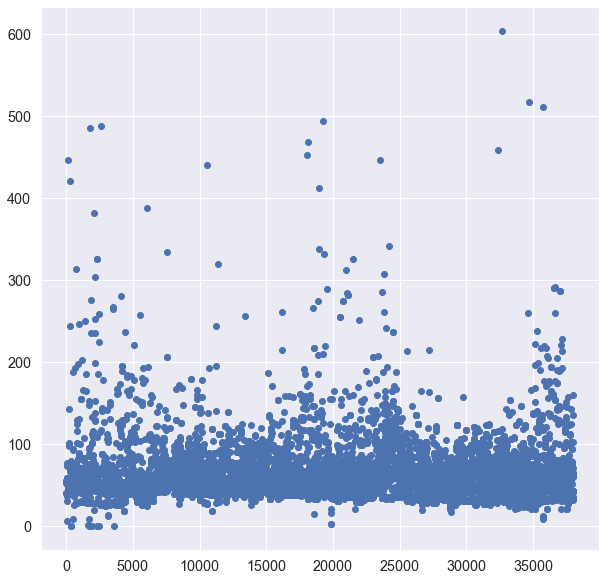

In [87]:
plt.plot(y_test,'o')